# Churn Prediction for Beta Bank: Maximizing Customer Retention with Data-Driven Insights

# Contents <a id='contents'></a>

[1. Contents](#contents)   
[2. Introduction](#introduction)  
[3. Project Goal](#project_goal)     
[4. Initialization](#initialization)  
[5. Load data](#load-data)  
[6. Data Description](#data-description)  
[7. Data Preprocessing](#data-preprocessing)      
[8. Transform categorical features into numerical features](#transform-categorical-features)    
[9. Divide encoded dataset into target and features](#target-and-features)  
[10. Divide target and features into train, validation & test set](#train-valid-test)  
[11. Feature scaling of train, validation & test set](#feature-scaling)  
[12. Train the models without taking into account the imbalance](#train-with-class-imbalance)  
[13. Fix the class imbalance](#fix-the-class-imbalance)  
[14. Train the models after fixing the imbalance](#train-without-class-imbalance)  
[15. Test the best model on test data](#test-the-best-model)  
[16. Conclusion](#conclusion)  

# 1. Introduction <a id='introduction'></a> 
[Back to Contents](#contents)

In the fast-paced and competitive world of banking, customer retention has emerged as a crucial factor for sustainable growth and success. **Beta Bank**, a prominent financial institution, has been facing a gradual exodus of customers, as they chip away little by little each month. **Recognizing the significance of preserving existing clients, Beta Bank has embarked on a mission to predict customer churn and implement strategic measures to retain valued customers**. This project aims to develop a robust churn prediction model using historical customer behavior data and contract termination records to identify customers who are likely to leave the bank soon.

# 2. Project Goal <a id='project_goal'></a>  
[Back to Contents](#contents)

The project's primary goal is **to develop a churn prediction model with the maximum possible F1 score** to accurately predict whether a customer will leave Beta Bank soon. To pass the project, **the model needs to achieve an F1 score of at least 0.59 on the test set**, indicating a strong predictive performance in correctly identifying customers who are likely to churn. The secondary goal is to assess the model's performance using the AUC-ROC metric and compare it with the F1 score to gain comprehensive insights into the model's predictive capabilities.

# 3. Initialization <a id='initialization'></a>  
[Back to Contents](#contents)

We need to import the `sklearn` library in Python because **it provides a wide range of tools and functionalities for machine learning tasks**. It includes various algorithms and evaluation metrics that are commonly used in the field.  

In this specific project, **we want to develop a model to predict whether a customer will leave the bank soon or not. This is a binary classification problem since we have two groups of classification: customer will exit and customer will not exit.**. 

We will train, test and predict using the following models for this task:  

1. **[Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#decision-trees)**: Decision trees are versatile and widely used in classification problems. They are simple to understand and interpret, and they can handle both numerical and categorical data. Decision trees create a tree-like model of decisions and their possible consequences, making them suitable for analyzing subscriber behavior and predicting their plan preference. The `sklearn.tree` module provides us with `DecisionTreeClassifier` class which is capable of performing multi-class classification on a dataset.

2. **[Random Forest Classifier](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)**: Random forests are an ensemble learning method that combines multiple decision trees to make predictions. They are known for their high accuracy and ability to handle complex datasets. The `sklearn.ensemble` module provides us with `RandomForestClassifier` class which is an averaging algorithm based on randomized decision trees.

3. **[Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)**: Logistic regression is a popular algorithm for binary classification problems. It models the relationship between the dependent variable and independent variables using the logistic function, which produces probabilities of class membership. The `sklearn.linear_model` module provides us with `LogisticRegression` class to implement the model.  

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle

from joblib import dump, load

# 4. Load data <a id='load-data'></a>  
[Back to Contents](#contents)

We have been provided dataset in `./datasets/Churn.csv`. Let's load the dataset in `df_churn` dataframe.

In [2]:
# Load the dataset from the given csv file
df_churn = pd.read_csv('./datasets/Churn.csv')

# 5. Data Description <a id='data-description'></a>  
[Back to Contents](#contents)

Let's have a peek into the data in the dataframe - `df_churn`.

In [3]:
# Get general information of the df_churn
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# Get first five rows of the dataframe - df_churn
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


The dataframe - `df_churn` contains various features related to Beta Bank's customers. Each row represents a unique customer, and the dataset comprises the following features:

1. **RowNumber**: A data string index representing the row number in the dataset.

2. **CustomerId**: A unique customer identifier, which serves as a key to distinguish individual customers.

3. **Surname**: The surname of the customer.

4. **CreditScore**: The credit score of the customer, reflecting their creditworthiness.

5. **Geography**: The country of residence of the customer.

6. **Gender**: The gender of the customer (e.g., Male or Female).

7. **Age**: The age of the customer.

8. **Tenure**: The period of maturation for a customer's fixed deposit, _measured in years_.

9. **Balance**: The account balance of the customer.

10. **NumOfProducts**: The number of banking products used by the customer (e.g., savings account, loans).

11. **HasCrCard**: A binary feature indicating whether the customer has a credit card (1 for yes, 0 for no).

12. **IsActiveMember**: A binary feature indicating the customer's activeness (1 for active, 0 for inactive).

13. **EstimatedSalary**: The estimated salary of the customer.

**Target Variable**:

The target variable is labeled as **Exited** which indicates whether a customer has left Beta Bank (1 for yes, 0 for no). This variable is used for the churn prediction task, where the objective is to predict if a customer is likely to churn or leave the bank soon.

**There are a few points that we can conclude from the above information**:
1. There are 10000 rows in the Dataframe - `df_churn`.
2. All the columns except `Tenure` don't have any missing values. 
3. The column - `Tenure` have only 9091 values. It means we have 909 missing values that we need to address.
4. The column names are in PascalCase. It will be great to have all of them converted to snake_case for better understanding. 

We will address these issues in the Data Preprocessing section.

# 6. Data Preprocessing <a id='data-preprocessing'></a>  
[Back to Contents](#contents)

## Change the column names <a id='change-the-column-names'></a>  
[Back to Contents](#contents)

The column names are in PascalCase. It will be great to have them converted into snake_case for better readability. So, let's go:

In [5]:
# Columns names before the rename
df_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# Rename columns from PascalCase to snake_case
new_column_names = {
    'RowNumber': 'row_number', 
    'CustomerId': 'customer_id', 
    'Surname': 'surname', 
    'CreditScore': 'credit_score', 
    'Geography': 'geography',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'num_of_products', 
    'HasCrCard': 'has_cr_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'exited'
}
df_churn = df_churn.rename(columns=new_column_names)

In [7]:
# Columns names after the rename
df_churn.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Great! We are making some progress! 

## Look for duplicates <a id='look-for-duplicates'></a>  
[Back to Contents](#contents)

Let's look if we have any duplicate rows:

In [8]:
# Check for duplicate rows in df_churn
df_churn.duplicated().sum()

0

Wow! That's a relief that our dataframe - `df_churn` is not having any duplicate rows. But, what about any implicit duplicates. Let's see if we have any duplicate customer IDs:

In [9]:
# Check for duplicate customer IDs in df_churn
df_churn['customer_id'].duplicated().sum()

0

Awesome! We don't have any duplicate customer IDs. Let's also check the different countries from which our customers come from:

In [10]:
# Get unique values with counts in geography column of df_churn
df_churn['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

It seems that we have customers from France, Germany and Spain. Great! Let's also do a quick validation on the values of the columns - `gender`, `has_cr_card`, `is_active_member` and `exited`:

In [11]:
df_churn['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [12]:
df_churn['has_cr_card'].value_counts()

1    7055
0    2945
Name: has_cr_card, dtype: int64

In [13]:
df_churn['is_active_member'].value_counts()

1    5151
0    4849
Name: is_active_member, dtype: int64

In [14]:
df_churn['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

So, finally we can say that we have no duplicates in `df_churn` and values are as expected.

## Look for missing values <a id='look-for-missing-values'></a>  
[Back to Contents](#contents)

We already saw above that `tenure` column has some missing values. Let's see how many?

In [15]:
# Check how many missing values does tenure have?
df_churn['tenure'].isna().sum()

909

We need to address 909 missing values. Its quite a significant number of records, so we can't just drop them. We need to replace them with some value. Let's check what are the mean and median of the `tenure` column:

In [16]:
# Mean of tenure column
df_churn['tenure'].mean()

4.997690023099769

In [17]:
# Median of tenure column
df_churn['tenure'].median()

5.0

Since, the mean and median, both are almost the same for the `tenure` column in `df_churn` dataframe, let's replace all the missing values with `5.0`:

In [18]:
# Replace all the missing values in tenure in df_churn
df_churn['tenure'] = df_churn['tenure'].fillna(5)
df_churn['tenure'].isna().sum()

0

Great! now we don't have any missing values to deal with.

## Look if the dataset is imbalanced <a id='look-for-imbalanced-dataset'></a>  
[Back to Contents](#contents)

Let's have a quick check if the dataframe - `df_churn` is balanced or not. We can plot a count plot on the column `exited` to see the balance of the distribution:

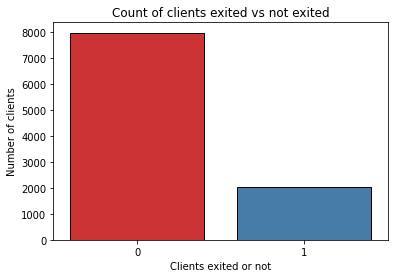

In [19]:
# Plot a count plot
sns_plot = sns.countplot(x='exited', data=df_churn, palette = "Set1", edgecolor = "black")

sns_plot.set_title('Count of clients exited vs not exited')
sns_plot.set_xlabel('Clients exited or not')
sns_plot.set_ylabel('Number of clients')

plt.show()

In [20]:
df_churn['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

We could clearly see that the dataframe - `df_churn` is having around 3 times more observations for the clients who have not exited the bank, than the ones who have. There is an imbalance in the data which will affect the way our ML models will learn from the training features.

## Remove columns not required for ML models <a id='remove-columns'></a>  
[Back to Contents](#contents)

Let's look at our dataframe again and get a list of all the columns it has:

In [21]:
# Get the list of columns in our dataframe
df_churn.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

If we think, the columns - `row_number`, `customer_id` and `surname`, don't affect the reason or chances of a person leaving the bank. So, let's get rid of these columns from out dataframe - `df_churn`:

In [22]:
# Drop columns not required for ML models
df_churn = df_churn.drop(columns=['row_number', 'customer_id', 'surname'])
df_churn.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

Great! Now, we are good to go.

# 7. Transform categorical features into numerical features <a id='transform-categorical-features'></a>  
[Back to Contents](#contents)

Let's get a quick general information of our dataframe - `df_churn` once again:

In [23]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


## One-Hot Encoding for Logistic Regression <a id='ohe'></a>  
[Back to Contents](#contents)

Let's have a peak into the dataframe - `df_churn`:

In [24]:
# Get random 10 records from the dataframe
df_churn.sample(n=10, random_state=234578)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
1666,611,France,Female,46,5.0,0.00,1,1,0,77677.14,1
7835,665,France,Female,41,8.0,96147.55,1,1,0,137037.97,0
5260,704,Germany,Female,35,3.0,154206.07,2,1,1,40261.49,0
4411,657,Spain,Male,42,5.0,41473.33,1,1,0,112979.60,1
3592,677,Spain,Male,56,5.0,123959.97,1,1,1,60590.72,1
9734,667,Germany,Male,70,3.0,77356.92,2,1,1,20881.96,0
8377,802,Spain,Male,40,4.0,0.00,2,1,1,81908.09,0
1701,792,France,Male,50,9.0,0.00,4,1,1,194700.81,1
319,429,France,Male,24,4.0,95741.75,1,1,0,46170.75,0
3374,735,Spain,Male,55,2.0,103176.62,1,0,1,163516.16,0


**Logistic Regression determines the target using a formula consisting of numerical features**. But, as we can see above that we have two columns - `geography` and `gender` as string. Let's convert these two categorical features or columns to numerical ones by ensuring that we don't fall into dummy trap:

In [25]:
# One-Hot Encoding without dummy trap
df_churn_ohe = pd.get_dummies(df_churn, drop_first=True)

# Get random 10 records from the dataframe
df_churn_ohe.sample(n=10, random_state=234578)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
1666,611,46,5.0,0.00,1,1,0,77677.14,1,0,0,0
7835,665,41,8.0,96147.55,1,1,0,137037.97,0,0,0,0
5260,704,35,3.0,154206.07,2,1,1,40261.49,0,1,0,0
4411,657,42,5.0,41473.33,1,1,0,112979.60,1,0,1,1
3592,677,56,5.0,123959.97,1,1,1,60590.72,1,0,1,1
9734,667,70,3.0,77356.92,2,1,1,20881.96,0,1,0,1
8377,802,40,4.0,0.00,2,1,1,81908.09,0,0,1,1
1701,792,50,9.0,0.00,4,1,1,194700.81,1,0,0,1
319,429,24,4.0,95741.75,1,1,0,46170.75,0,0,0,1
3374,735,55,2.0,103176.62,1,0,1,163516.16,0,0,1,1


Great! We have One-Hot Encoded data into `df_churn_ohe` dataframe now that we can use it for Logistic Regression.

## Label Encoding for Tree-based ML Algorithms <a id='label-encoding'></a>  
[Back to Contents](#contents)

For Tree-based ML Algorithms, One-Hot Encoded data is not the best. The primary reason is that unlike regression models that have access to the whole spectrum of features at once, the tree-based model can process only one feature at a time.  
The best approach for trees is making splits by raw categoricals but since `sklearn` doesn't support it yet, the second best approach is **Label Encoding**.  Also, since we are looking at `geography` and `gender` columns - which are **Nominal variables** as there is no significance of order in them, we are good to go with Label Encoding:

In [26]:
encoder = OrdinalEncoder()
df_churn_ordinal = pd.DataFrame(encoder.fit_transform(df_churn), columns=df_churn.columns)
df_churn_ordinal.sample(n=10, random_state=234578)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
1666,220.0,0.0,0.0,28.0,5.0,0.0,0.0,1.0,0.0,3850.0,1.0
7835,274.0,0.0,0.0,23.0,8.0,1311.0,0.0,1.0,0.0,6876.0,0.0
5260,313.0,1.0,0.0,17.0,3.0,5606.0,1.0,1.0,1.0,1966.0,0.0
4411,266.0,2.0,1.0,24.0,5.0,38.0,0.0,1.0,0.0,5655.0,1.0
3592,286.0,2.0,1.0,38.0,5.0,3564.0,0.0,1.0,1.0,2989.0,1.0
9734,276.0,1.0,1.0,52.0,3.0,491.0,1.0,1.0,1.0,1031.0,0.0
8377,411.0,2.0,1.0,22.0,4.0,0.0,1.0,1.0,1.0,4082.0,0.0
1701,401.0,0.0,1.0,32.0,9.0,0.0,3.0,1.0,1.0,9724.0,1.0
319,38.0,0.0,1.0,6.0,4.0,1283.0,0.0,1.0,0.0,2249.0,0.0
3374,344.0,2.0,1.0,37.0,2.0,1817.0,0.0,0.0,1.0,8169.0,0.0


# 8. Divide encoded dataset into target and features <a id='target-and-features'></a>  
[Back to Contents](#contents)

Splitting the dataset into target and features is a fundamental step in preparing the data for building predictive models. It involves separating the input data (**features**) from the output data (**target**) that we want the model to predict. In supervised learning, where the model is trained on labeled data, the target variable is typically provided in the dataset. The model learns from the relationship between the features and the target during training and uses that knowledge to make predictions or classifications on new data.  

## One-Hot Encoded Dataset - `df_churn_ohe`
[Back to Contents](#contents)

In [27]:
ohe_target = df_churn_ohe['exited']
ohe_target.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: exited, dtype: int64

In [28]:
ohe_features = df_churn_ohe.drop('exited', axis=1)
ohe_features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


## Label Encoded Dataset - `df_churn_ordinal`
[Back to Contents](#contents)

In [29]:
ordinal_target = df_churn_ordinal['exited']
ordinal_target.head(10)

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
5    1.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: exited, dtype: float64

In [30]:
ordinal_features = df_churn_ordinal.drop('exited', axis=1)
ordinal_features.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,228.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0
1,217.0,2.0,0.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0
2,111.0,0.0,0.0,24.0,8.0,5793.0,2.0,1.0,0.0,5707.0
3,308.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0
4,459.0,2.0,0.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0


# 9. Divide target and features into train, validation & test set <a id='train-valid-test'></a>  
[Back to Contents](#contents)

Awesome! In machine learning, it is common practice to split the available data into three separate sets: the **training set**, the **validation set**, and the **test set**. Each set serves a specific purpose in the model development and evaluation process. Here's a breakdown of each set:  

1. **Training Set**:  
The training set is the largest portion of the dataset used to train the machine learning model. It contains input features and their corresponding target values. The model learns patterns and relationships between the features and the target by optimizing its parameters or weights based on this training data. The training set is crucial for the model to capture the underlying patterns in the data and generalize well to unseen instances.

2. **Validation Set**:
The validation set is used during the model development process to tune hyperparameters and evaluate the model's performance. The validation set helps to assess the generalization ability of the model and avoid overfitting (when the model performs well on the training data but poorly on new data). It provides an unbiased estimate of the model's performance and helps in making decisions on model improvements or hyperparameter adjustments.

3. **Test Set**:
The test set is a separate portion of the dataset that is used to evaluate the final performance of the trained model. It serves as an unbiased evaluation of the model's ability to generalize to new, unseen data. The test set should be representative of the real-world data that the model is expected to perform on. It should not be used during model development or hyperparameter tuning to ensure an unbiased assessment.  

**It is important to note that the data should be split randomly and in a stratified manner if the dataset is imbalanced, ensuring that the distribution of target classes is maintained across the different sets**. We will look into the imbalance issues in a while.

In short, the training set is used to train the model, the validation set is used to tune hyperparameters and evaluate model performance, and the test set is used for the final unbiased evaluation of the trained model's performance.  

Now, we need to split the source data i.e. `features` and `target` into a training set (`features_train`, `target_train`), a validation set (`features_valid`, `target_valid`), and a test set (`features_test`, `target_test`). In order to split the data we will use `train_test_split` method from `sklearn.model_selection` module. And to make sure that the data split is random, we should use `random_state` paramter.  

But the question is what should be the proportion of split for each category? The proportion of data split for each category (training set, validation set, and test set) is a matter of choice and can depend on various factors such as the size of the dataset, the complexity of the problem, and the availability of data. The common rule is to split data in `3:1:1` proportion:

In [31]:
# Decide on a value for random state
rand_state = 5678989

## One-Hot Encoded Dataset - `ohe_target` & `ohe_features`
[Back to Contents](#contents)

In [32]:
# Split the source dataset - ohe_features and ohe_target into two parts - 60% and 40%
# 60% split set will become the training dataset
# 40% split set will be used to get the validation set and test set
ohe_features_train, ohe_features_remaining, ohe_target_train, ohe_target_remaining = train_test_split(ohe_features, ohe_target, test_size=0.4, random_state=rand_state)

In [33]:
# Get the total number of observations in ohe_features_train
ohe_features_train.shape

(6000, 11)

In [34]:
# Get the total number of observations in ohe_target_train
ohe_target_train.shape

(6000,)

In [35]:
# Split the remaining dataset - ohe_features_remaining and ohe_target_remaining into two equal parts
# The first split set will become the validation dataset
# The second split set will become the test dataset
ohe_features_valid, ohe_features_test, ohe_target_valid, ohe_target_test = train_test_split(ohe_features_remaining, ohe_target_remaining, test_size=0.5, random_state=rand_state)

In [36]:
# Get the total number of observations in ohe_features_valid
ohe_features_valid.shape

(2000, 11)

In [37]:
# Get the total number of observations in ohe_target_valid
ohe_target_valid.shape

(2000,)

In [38]:
# Get the total number of observations in ohe_features_test
ohe_features_test.shape

(2000, 11)

In [39]:
# Get the total number of observations in ohe_target_test
ohe_target_test.shape

(2000,)

Great! Now, we have our One-Hot Encoded `features` and `target` divided into train, validation and test datasets.

## Label Encoded Dataset - `ordinal_target` & `ordinal_features`
[Back to Contents](#contents)

Now, let's do the same for the Label Encoded `feature` and `target`:

In [40]:
# Split the source dataset - ordinal_features and ordinal_target into two parts - 60% and 40%
# 60% split set will become the training dataset
# 40% split set will be used to get the validation set and test set
ordinal_features_train, ordinal_features_remaining, ordinal_target_train, ordinal_target_remaining = train_test_split(ordinal_features, ordinal_target, test_size=0.4, random_state=rand_state)

In [41]:
# Get the total number of observations in ordinal_features_train
ordinal_features_train.shape

(6000, 10)

In [42]:
# Get the total number of observations in ordinal_target_train
ordinal_target_train.shape

(6000,)

In [43]:
# Split the remaining dataset - ordinal_features_remaining and ordinal_target_remaining into two equal parts
# The first split set will become the validation dataset
# The second split set will become the test dataset
ordinal_features_valid, ordinal_features_test, ordinal_target_valid, ordinal_target_test = train_test_split(ordinal_features_remaining, ordinal_target_remaining, test_size=0.5, random_state=rand_state)

In [44]:
# Get the total number of observations in ordinal_features_valid
ordinal_features_valid.shape

(2000, 10)

In [45]:
# Get the total number of observations in ordinal_target_valid
ordinal_target_valid.shape

(2000,)

In [46]:
# Get the total number of observations in ordinal_features_test
ordinal_features_test.shape

(2000, 10)

In [47]:
# Get the total number of observations in ordinal_target_test
ordinal_target_test.shape

(2000,)

Great! Now, we have our Label Encoded `features` and `target` divided into train, validation and test datasets.

# 10. Feature scaling of train, validation & test set <a id='feature-scaling'></a>  
[Back to Contents](#contents)

Feature scaling is an important preprocessing step in machine learning. Scaling the features ensures that all input variables are on a similar scale, preventing some features from dominating others in the model training process. When dealing with numerical features with different ranges or units, feature scaling becomes necessary to achieve better model performance and convergence.  

The `StandardScaler` from the `sklearn.preprocessing` module in `scikit-learn` is a feature scaling technique used to standardize numerical features. Standardization transforms the features so that they have a mean of 0 and a standard deviation of 1. This process is essential for algorithms that rely on distance-based calculations or gradient-based optimization, as it ensures that all features are on a similar scale.

**Key points about `StandardScaler`**:

1. **Fit and Transform**: The `StandardScaler` is an instance of a transformer in `scikit-learn`. It follows the same fit and transform paradigm as other preprocessing techniques. First, it is fitted to the training data using the `fit()` method to compute the mean and standard deviation of each feature. Then, the `transform()` method is used to transform the training data and any subsequent data using the computed mean and standard deviation.

2. **Standardized Features**: After applying the `StandardScaler`, each feature in the dataset will have a mean of 0 and a standard deviation of 1.

3. **No Impact on Categorical Features**: The `StandardScaler` should only be used for numerical features. It does not affect categorical features or features that have a constant value across all samples.

In [48]:
# Get all the numeric columns
numeric_cols = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

In [49]:
scaler = StandardScaler()

## One-Hot Encoded Dataset
[Back to Contents](#contents)

In [50]:
scaler.fit(ohe_features_train[numeric_cols])

StandardScaler()

In [51]:
# Scaling the features
pd.options.mode.chained_assignment = None
ohe_features_train[numeric_cols] = scaler.transform(ohe_features_train[numeric_cols])
ohe_features_valid[numeric_cols] = scaler.transform(ohe_features_valid[numeric_cols])
ohe_features_test[numeric_cols] = scaler.transform(ohe_features_test[numeric_cols])

## Label Encoded Dataset
[Back to Contents](#contents)

In [52]:
scaler.fit(ordinal_features_train[numeric_cols])

StandardScaler()

In [53]:
# Scaling the features
pd.options.mode.chained_assignment = None
ordinal_features_train[numeric_cols] = scaler.transform(ordinal_features_train[numeric_cols])
ordinal_features_valid[numeric_cols] = scaler.transform(ordinal_features_valid[numeric_cols])
ordinal_features_test[numeric_cols] = scaler.transform(ordinal_features_test[numeric_cols])

# 11. Train the models without taking into account the imbalance <a id='train-with-class-imbalance'></a>  
[Back to Contents](#contents)

## Decision Tree Classifier Model
[Back to Contents](#contents)

In [54]:
best_decision_tree_classifier_model = None
best_f1_score = 0
max_depth = 0

# Change max_depth hyperparameter from 1 to 10 & find at what depth the model is the most accurate
for depth in range(1, 11):
    # Instantiate a model with max_depth = depth
    current_decision_tree_classifier_model = DecisionTreeClassifier(max_depth=depth, random_state=rand_state)

    # Train the model using training set
    current_decision_tree_classifier_model.fit(ordinal_features_train, ordinal_target_train)

    # Predict the target using the validation set features
    current_predictions = current_decision_tree_classifier_model.predict(ordinal_features_valid)
    
    # Check the f1-score of the predictions
    current_f1_score = f1_score(ordinal_target_valid, current_predictions)
    
    # Check for the best model until the current iteration
    if(best_f1_score < current_f1_score):
        best_f1_score = current_f1_score
        max_depth = depth
        best_decision_tree_classifier_model = current_decision_tree_classifier_model

# Save the best Decision Tree Classifer model
dump(best_decision_tree_classifier_model, 'best_decision_tree_classifier_model.joblib')

['best_decision_tree_classifier_model.joblib']

The best Decision Tree Classifer model is of depth 9 with the following scores: 
Accuracy Score on Training Set: 0.8925
Accuracy Score on Validation Set: 0.833
Recall Score on Validation Set: 0.43532338308457713
Precision Score on Validation Set: 0.6205673758865248
F1 Score on Validation Set: 0.5116959064327485


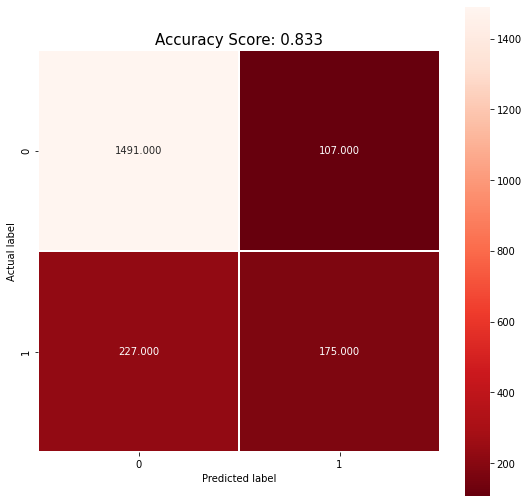

In [55]:
# Load the best Decision Tree Classifier model
decision_tree_classifier_model = load('best_decision_tree_classifier_model.joblib')

# Predict the target using the validation set features for the best model
predictions_train = decision_tree_classifier_model.predict(ordinal_features_train)
predictions_valid = decision_tree_classifier_model.predict(ordinal_features_valid)

# Calculate accuracy score of the the best model
accuracy_score_train = accuracy_score(ordinal_target_train, predictions_train)
accuracy_score_valid = accuracy_score(ordinal_target_valid, predictions_valid)

# Calculate recall_score of the the best model
recall_score_valid = recall_score(ordinal_target_valid, predictions_valid)

# Calculate precision_score of the the best model
precision_score_valid = precision_score(ordinal_target_valid, predictions_valid)

# Calculate consfusion matrix of the the best model
conf_matrix = confusion_matrix(ordinal_target_valid, predictions_valid)

# Print out the results
print(f'The best Decision Tree Classifer model is of depth {max_depth} with the following scores: ')
print(f'Accuracy Score on Training Set: {accuracy_score_train}')
print(f'Accuracy Score on Validation Set: {accuracy_score_valid}')
print(f'Recall Score on Validation Set: {recall_score_valid}')
print(f'Precision Score on Validation Set: {precision_score_valid}')
print(f'F1 Score on Validation Set: {best_f1_score}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

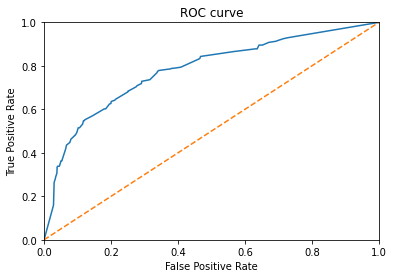

In [56]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_valid = decision_tree_classifier_model.predict_proba(ordinal_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(ordinal_target_valid, probabilities_one_valid)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [57]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ordinal_target_valid, probabilities_one_valid)
print(f'The AUC-ROC metric for the model is {auc_roc}')

The AUC-ROC metric for the model is 0.7795386334908685


Based on the above results for the **Decision Tree Classifier** model, we can draw the following conclusions:

1. **Accuracy Score**: The model achieved an accuracy of approximately `89.25%` on the training set and `83.3%` on the validation set. While the accuracy is reasonably high, it may not be the most reliable metric to evaluate the model's performance, especially when dealing with imbalanced datasets, as is the case here.

2. **Recall Score**: The recall score on the validation set is approximately `43.53%`. Recall measures the ability of the model to correctly identify positive cases (churners) out of all actual positive cases. In this context, the recall score indicates that the model can identify around 43.53% of the customers who actually churned. While this is not particularly high, it suggests that the model can detect some of the churners, but there is still room for improvement.

3. **Precision Score**: The precision score on the validation set is approximately `62.06%`. Precision measures the proportion of correctly predicted positive cases (churners) out of all predicted positive cases. A precision score of `62.06%` indicates that when the model predicts a customer to churn, it is correct about 62.06% of the time. This suggests that the model's predictions are reasonably accurate when it comes to identifying churners.

4. **F1 Score**: The F1 score on the validation set is approximately `51.17%`. The F1 score is a useful metric for imbalanced datasets, as it considers both false positives and false negatives. A score of 51.17% indicates a reasonable balance between precision and recall, but there is still room for improvement.

5. **Confusion Matrix**: The confusion matrix shows the model's performance in terms of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN). The top-left cell represents true negatives (TN), indicating **1491 customers were correctly classified as non-churners**. The top-right cell represents false positives (FP), indicating **107 customers were incorrectly classified as churners**. The bottom-left cell represents false negatives (FN), indicating **227 customers were incorrectly classified as non-churners**. The bottom-right cell represents true positives (TP), indicating **175 customers were correctly classified as churners**.  

In summary, the **Decision Tree Classifier model** is showing some level of performance in identifying churners, as evident from the precision, recall, and F1 scores. However, there is clear class imbalance, which affects the model's ability to predict churn effectively.

## Random Forest Classifier Model
[Back to Contents](#contents)

In [58]:
best_random_forest_classifier_model = None
best_f1_score = 0
best_no_of_estimators = 0
max_depth = 0

# Change n_estimators hyperparameter from 10 to 80 (increment by 10 steps)
# And find how many number of trees the ensemble should have for the model to be the most accurate
for no_of_estimators in range(10, 90, 10):
    for depth in range(1, 11):
        # Instantiate a model with n_estimators = no_of_estimators (used to set number of trees in the ensemble)
        current_random_forest_classifier_model = RandomForestClassifier(n_estimators=no_of_estimators, max_depth=depth, random_state=3478981)

        # Train the model using training set
        current_random_forest_classifier_model.fit(ordinal_features_train, ordinal_target_train)

        # Predict the target using the validation set features
        current_predictions = current_random_forest_classifier_model.predict(ordinal_features_valid)

        # Check the f1-score of the predictions
        current_f1_score = f1_score(ordinal_target_valid, current_predictions)

        # Check for the best accurate model until the current iteration
        if(best_f1_score < current_f1_score):
            best_f1_score = current_f1_score
            best_no_of_estimators = no_of_estimators
            max_depth = depth
            best_random_forest_classifier_model = current_random_forest_classifier_model

# Save the best Random Tree Classifer model
dump(best_random_forest_classifier_model, 'best_random_forest_classifier_model.joblib')


['best_random_forest_classifier_model.joblib']

The best Random Forest Classifier model is of 80 no of trees with max depth of 10 with the following scores: 
Accuracy Score on Training Set: 0.9063333333333333
Accuracy Score on Validation Set: 0.8575
Recall Score on Validation Set: 0.40049751243781095
Precision Score on Validation Set: 0.7853658536585366
F1 Score on Validation Set: 0.5304777594728172


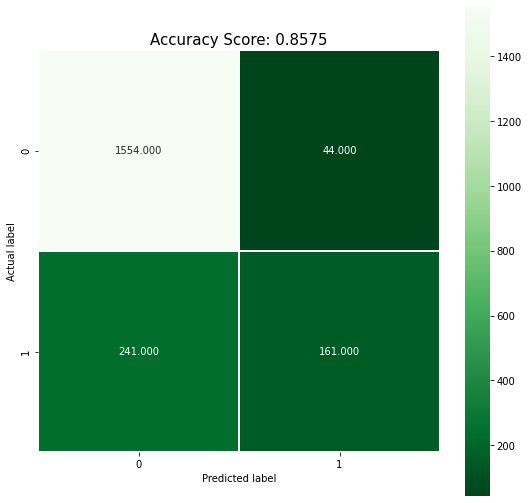

In [59]:
# Load the best Random Forest Classifier model
random_forest_classifier_model = load('best_random_forest_classifier_model.joblib')

# Predict the target using the validation set features for the best model
predictions_train = random_forest_classifier_model.predict(ordinal_features_train)
predictions_valid = random_forest_classifier_model.predict(ordinal_features_valid)

# Calculate accuracy score of the the best model
accuracy_score_train = accuracy_score(ordinal_target_train, predictions_train)
accuracy_score_valid = accuracy_score(ordinal_target_valid, predictions_valid)

# Calculate recall_score of the the best model
recall_score_valid = recall_score(ordinal_target_valid, predictions_valid)

# Calculate precision_score of the the best model
precision_score_valid = precision_score(ordinal_target_valid, predictions_valid)

# Calculate consfusion matrix of the the best model
conf_matrix = confusion_matrix(ordinal_target_valid, predictions_valid)

# Print out the results
print(f'The best Random Forest Classifier model is of {no_of_estimators} no of trees with max depth of {max_depth} with the following scores: ')
print(f'Accuracy Score on Training Set: {accuracy_score_train}')
print(f'Accuracy Score on Validation Set: {accuracy_score_valid}')
print(f'Recall Score on Validation Set: {recall_score_valid}')
print(f'Precision Score on Validation Set: {precision_score_valid}')
print(f'F1 Score on Validation Set: {best_f1_score}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

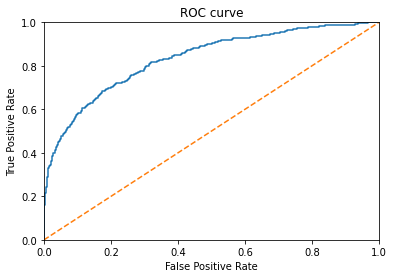

In [60]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_valid = random_forest_classifier_model.predict_proba(ordinal_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(ordinal_target_valid, probabilities_one_valid)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [61]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ordinal_target_valid, probabilities_one_valid)
print(f'The AUC-ROC metric for the model is {auc_roc}')

The AUC-ROC metric for the model is 0.833591740919931


Based on the above results for the **Random Forest Classifier** model, we can draw the following conclusions:

1. **Accuracy Score**: The model achieved an accuracy of approximately `90.63%` on the training set and `85.75%` on the validation set. Similar to the Decision Tree model, the accuracy is relatively high. However, we need to consider the class imbalance to better evaluate the model's performance.

2. **Recall Score**: The recall score on the validation set is approximately `40.05%`. Recall measures the ability of the model to correctly identify positive cases (churners) out of all actual positive cases. With a recall of `40.05%`, the model can identify around `40.05%` of the customers who actually churned. Like the Decision Tree model, this indicates that the model can detect some churners, but there is room for improvement.

3. **Precision Score**: The precision score on the validation set is approximately `78.54%`. Precision measures the proportion of correctly predicted positive cases (churners) out of all predicted positive cases. A precision score of `78.54%` indicates that when the model predicts a customer to churn, it is correct about `78.54%` of the time. This suggests that the model's predictions are more accurate compared to the Decision Tree model when it comes to identifying churners.

4. **F1 Score**: The F1 score on the validation set is approximately `53.05%`. A score of `53.05%` indicates a moderate balance between precision and recall, but there is still room for improvement.

5. **Confusion Matrix**: The confusion matrix shows the model's performance in terms of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN). The top-left cell represents true negatives (TN), indicating `1554` customers were correctly classified as non-churners. The top-right cell represents false positives (FP), indicating `44` customers were incorrectly classified as churners. The bottom-left cell represents false negatives (FN), indicating `241` customers were incorrectly classified as non-churners. The bottom-right cell represents true positives (TP), indicating `161` customers were correctly classified as churners.  

In summary, the Random Forest Classifier model shows improved performance compared to the Decision Tree model, especially in terms of precision. However, there is still an evident class imbalance that affects the model's ability to predict churn effectively.  

## Logistic Regression Model
[Back to Contents](#contents)

In [62]:
# Instantiate a model with liblinear as solver
logistic_regression_model = LogisticRegression(solver='liblinear', random_state=rand_state)

# Train the model using training set
logistic_regression_model.fit(ohe_features_train, ohe_target_train)

# Predict the target using the validation set features
predictions_valid = logistic_regression_model.predict(ohe_features_valid)

# Check the accuracy of the predictions
accuracy = accuracy_score(ohe_target_valid, predictions_valid)

# Save the Logistic Regression model
dump(logistic_regression_model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

The best Logistic Regression model by liblinear solver with the following scores: 
Accuracy Score on Training Set: 0.8108333333333333
Accuracy Score on Validation Set: 0.808
Recall Score on Validation Set: 0.20398009950248755
Precision Score on Validation Set: 0.5616438356164384
F1 Score on Validation Set: 0.29927007299270075


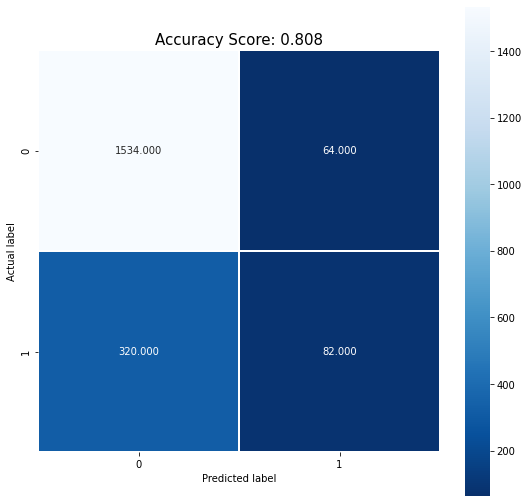

In [63]:
# Load the best Logistic Regression model
logistic_regression_model = load('logistic_regression_model.joblib')

# Predict the target using the validation set features for the best model
predictions_train = logistic_regression_model.predict(ohe_features_train)
predictions_valid = logistic_regression_model.predict(ohe_features_valid)

# Calculate accuracy score of the the best model
accuracy_score_train = accuracy_score(ohe_target_train, predictions_train)
accuracy_score_valid = accuracy_score(ohe_target_valid, predictions_valid)

# Calculate recall_score of the the best model
recall_score_valid = recall_score(ohe_target_valid, predictions_valid)

# Calculate precision_score of the the best model
precision_score_valid = precision_score(ohe_target_valid, predictions_valid)

# Calculate the f1-score of the the best model
f1_score_valid = f1_score(ohe_target_valid, predictions_valid)

# Calculate consfusion matrix of the the best model
conf_matrix = confusion_matrix(ohe_target_valid, predictions_valid)

# Print out the results
print(f'The best Logistic Regression model by liblinear solver with the following scores: ')
print(f'Accuracy Score on Training Set: {accuracy_score_train}')
print(f'Accuracy Score on Validation Set: {accuracy_score_valid}')
print(f'Recall Score on Validation Set: {recall_score_valid}')
print(f'Precision Score on Validation Set: {precision_score_valid}')
print(f'F1 Score on Validation Set: {f1_score_valid}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

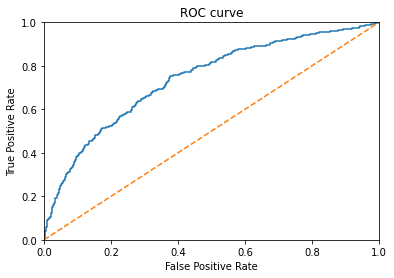

In [64]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_valid = logistic_regression_model.predict_proba(ohe_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(ohe_target_valid, probabilities_one_valid)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [65]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ohe_target_valid, probabilities_one_valid)
print(f'The AUC-ROC metric for the model is {auc_roc}')

The AUC-ROC metric for the model is 0.739199808217984


Based on the above results for the Logistic Regression model with the liblinear solver, we can draw the following conclusions:  

1. **Accuracy Score**: The model achieved an accuracy of approximately `81.08%` on the training set and `80.8%` on the validation set. While the accuracy is relatively high, it may not be the most reliable metric to evaluate the model's performance, especially when dealing with imbalanced datasets, as is the case here.

2. **Recall Score**: The recall score on the validation set is approximately `20.4%`. Recall measures the ability of the model to correctly identify positive cases (churners) out of all actual positive cases. A recall of `20.4%` indicates that the model can identify only around `20.4%` of the customers who actually churned. This suggests that the model's ability to detect churners is relatively limited.

3. **Precision Score**: The precision score on the validation set is approximately `56.2%`. Precision measures the proportion of correctly predicted positive cases (churners) out of all predicted positive cases. A precision score of `56.2%` indicates that when the model predicts a customer to churn, it is correct about `56.2%` of the time. This suggests that the model's predictions have moderate accuracy when it comes to identifying churners.

4. **F1 Score**: The F1 score on the validation set is approximately `29.9%`. A score of `29.9%` indicates a relatively low balance between precision and recall, reflecting the model's limitations in identifying churners effectively.

5. **Confusion Matrix**: The confusion matrix shows the model's performance in terms of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN). The top-left cell represents true negatives (TN), indicating `1534` customers were correctly classified as non-churners. The top-right cell represents false positives (FP), indicating `64` customers were incorrectly classified as churners. The bottom-left cell represents false negatives (FN), indicating `320` customers were incorrectly classified as non-churners. The bottom-right cell represents true positives (TP), indicating `82` customers were correctly classified as churners.  

In summary, the Logistic Regression model with the liblinear solver exhibits limited performance in predicting churn. The low recall and F1 score indicate that the model is not effectively capturing churners, and the precision score suggests that the model's predictions may be overly optimistic.

# 12. Fix the class imbalance <a id='fix-the-class-imbalance'></a>  
[Back to Contents](#contents)

In [66]:
# Print out the lengths of the negative and positive outcomes for training btarget
print(len(ordinal_target_train[ordinal_target_train == 0]))
print(len(ordinal_target_train[ordinal_target_train == 1]))

4772
1228


## Downsampling the training set
[Back to Contents](#contents)

**Downsampling** is a technique used to address class imbalance in a dataset, particularly in the context of binary classification problems where one class (the minority class) is significantly underrepresented compared to the other class (the majority class).  

In downsampling, we deliberately reduce the number of instances of the majority class in the dataset to match the number of instances of the minority class. This is typically done randomly, removing a subset of instances from the majority class until the class distribution is balanced. The objective is to create a new balanced dataset that has an equal number of samples for each class.  

Downsampling is performed in several steps:
1. Split the training sample into negative and positive observations;
2. Randomly drop a portion of the negative observations;
3. Create a new training sample based on the data obtained;
4. Shuffle the data. Make sure the positive data doesn't follow the negative data: this will make it harder for the algorithms to learn.

In [67]:
# Function to downsample the training set
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=rand_state)]+ [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=rand_state)]+ [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [68]:
# Downsampling for label encoded training set
ordinal_features_downsampled, ordinal_target_downsampled = downsample(ordinal_features_train, ordinal_target_train, 0.25)

# Print out the lengths of the negative and positive outcomes for downsampled training target
print(len(ordinal_target_downsampled[ordinal_target_downsampled == 0]))
print(len(ordinal_target_downsampled[ordinal_target_downsampled == 1]))

1193
1228


In [69]:
# Downsampling for one-hot encoded training set
ohe_features_downsampled, ohe_target_downsampled = downsample(ohe_features_train, ohe_target_train, 0.25)

# Print out the lengths of the negative and positive outcomes for downsampled training target
print(len(ohe_target_downsampled[ohe_target_downsampled == 0]))
print(len(ohe_target_downsampled[ohe_target_downsampled == 1]))

1193
1228


## Upsampling the training set
[Back to Contents](#contents)

**Upsampling** is a technique used to address class imbalance in a dataset, particularly in the context of binary classification problems where one class (the minority class) is significantly underrepresented compared to the other class (the majority class). Class imbalance can lead to biased machine learning models that may have poor performance in predicting the minority class.  

In upsampling, we artificially increase the number of instances of the minority class to balance the class distribution. This is typically done by creating duplicate or synthetic samples from the existing instances of the minority class. The objective is to create a new balanced dataset that has an equal number of samples for each class.    

Upsampling is performed in several steps:
1. Split the training sample into negative and positive observations;
2. Duplicate the positive observations several times;
3. Create a new training sample based on the data obtained;
4. Shuffle the data: identical questions following one another will not help the training.

In [70]:
# Function to upsample the training set
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [71]:
# Upsampling for label encoded training set
ordinal_features_upsampled, ordinal_target_upsampled = upsample(ordinal_features_train, ordinal_target_train, 4)

# Print out the lengths of the negative and positive outcomes for upsampled training target
print(len(ordinal_target_upsampled[ordinal_target_upsampled == 0]))
print(len(ordinal_target_upsampled[ordinal_target_upsampled == 1]))

4772
4912


In [72]:
# Upsampling for one-hot encoding training set
ohe_features_upsampled, ohe_target_upsampled = upsample(ohe_features_train, ohe_target_train, 4)

# Print out the lengths of the negative and positive outcomes for upsampled training target
print(len(ohe_target_upsampled[ohe_target_upsampled == 0]))
print(len(ohe_target_upsampled[ohe_target_upsampled == 1]))

4772
4912


# 13. Train the models after fixing the imbalance <a id='train-without-class-imbalance'></a>  
[Back to Contents](#contents)

## Decision Tree Classifier Model
[Back to Contents](#contents)

In [73]:
# Training Decision Tree Classifier Model on downsampled training data

best_decision_tree_classifier_model = None
best_f1_score = 0
max_depth = 0

# Change max_depth hyperparameter from 1 to 10 & find at what depth the model is the most accurate
for depth in range(1, 11):
    # Instantiate a model with max_depth = depth
    current_decision_tree_classifier_model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=rand_state)

    # Train the model using training set
    current_decision_tree_classifier_model.fit(ordinal_features_downsampled, ordinal_target_downsampled)

    # Predict the target using the validation set features
    current_predictions = current_decision_tree_classifier_model.predict(ordinal_features_valid)
    
    # Check the f1-score of the predictions
    current_f1_score = f1_score(ordinal_target_valid, current_predictions)
    
    # Check for the best model until the current iteration
    if(best_f1_score < current_f1_score):
        best_f1_score = current_f1_score
        max_depth = depth
        best_decision_tree_classifier_model = current_decision_tree_classifier_model

# Save the best Decision Tree Classifer model
dump(best_decision_tree_classifier_model, 'best_decision_tree_classifier_model_downsampled.joblib')

['best_decision_tree_classifier_model_downsampled.joblib']

The best Decision Tree Classifer model is of depth 5 with the following scores: 
Accuracy Score on Training Set: 0.7699297810821975
Accuracy Score on Validation Set: 0.755
Recall Score on Validation Set: 0.654228855721393
Precision Score on Validation Set: 0.42833876221498374
F1 Score on Validation Set: 0.5177165354330708


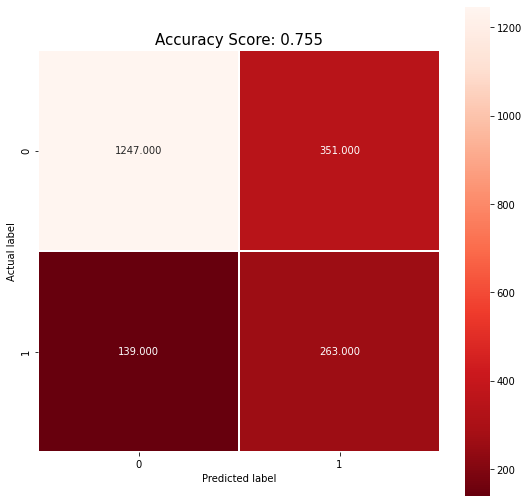

In [74]:
# Load the best Decision Tree Classifier model trained on downsampled training dataset
decision_tree_classifier_model = load('best_decision_tree_classifier_model_downsampled.joblib')

# Predict the target using the validation set features for the best model
predictions_train = decision_tree_classifier_model.predict(ordinal_features_downsampled)
predictions_valid = decision_tree_classifier_model.predict(ordinal_features_valid)

# Calculate accuracy score of the the best model
accuracy_score_train = accuracy_score(ordinal_target_downsampled, predictions_train)
accuracy_score_valid = accuracy_score(ordinal_target_valid, predictions_valid)

# Calculate recall_score of the the best model
recall_score_valid = recall_score(ordinal_target_valid, predictions_valid)

# Calculate precision_score of the the best model
precision_score_valid = precision_score(ordinal_target_valid, predictions_valid)

# Calculate consfusion matrix of the the best model
conf_matrix = confusion_matrix(ordinal_target_valid, predictions_valid)

# Print out the results
print(f'The best Decision Tree Classifer model is of depth {max_depth} with the following scores: ')
print(f'Accuracy Score on Training Set: {accuracy_score_train}')
print(f'Accuracy Score on Validation Set: {accuracy_score_valid}')
print(f'Recall Score on Validation Set: {recall_score_valid}')
print(f'Precision Score on Validation Set: {precision_score_valid}')
print(f'F1 Score on Validation Set: {best_f1_score}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

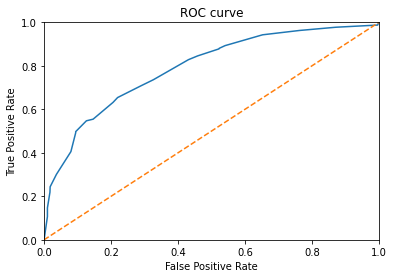

In [75]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_valid = decision_tree_classifier_model.predict_proba(ordinal_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(ordinal_target_valid, probabilities_one_valid)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [76]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ordinal_target_valid, probabilities_one_valid)
print(f'The AUC-ROC metric for the model is {auc_roc}')

The AUC-ROC metric for the model is 0.7905310742906244


Based on the above results for the **Decision Tree Classifier model trained after downsampling the training data**, we can draw the following conclusions:

| Metric           | Training Set | Validation Set            |
|------------------|--------------|---------------------------|
| Accuracy Score   | 0.7699       | 0.7550                    |
| Recall Score     | -            | 0.6542                    |
| Precision Score  | -            | 0.4283                    |
| F1 Score         | -            | 0.5177                    |
| Confusion Matrix | -            | [[1247, 351], [139, 263]] |

In summary, after downsampling the training data to address class imbalance, the Decision Tree Classifier model has shown some improvement in identifying churners compared to the previous model without class imbalance handling. The recall score has increased, indicating a better ability to capture churners. However, the precision remains relatively .

In [77]:
# Training Decision Tree Classifier Model on upsampled training data

best_decision_tree_classifier_model = None
best_f1_score = 0
max_depth = 0

# Change max_depth hyperparameter from 1 to 10 & find at what depth the model is the most accurate
for depth in range(1, 11):
    # Instantiate a model with max_depth = depth
    current_decision_tree_classifier_model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=rand_state)

    # Train the model using training set
    current_decision_tree_classifier_model.fit(ordinal_features_upsampled, ordinal_target_upsampled)

    # Predict the target using the validation set features
    current_predictions = current_decision_tree_classifier_model.predict(ordinal_features_valid)
    
    # Check the f1-score of the predictions
    current_f1_score = f1_score(ordinal_target_valid, current_predictions)
    
    # Check for the best model until the current iteration
    if(best_f1_score < current_f1_score):
        best_f1_score = current_f1_score
        max_depth = depth
        best_decision_tree_classifier_model = current_decision_tree_classifier_model

# Save the best Decision Tree Classifer model
dump(best_decision_tree_classifier_model, 'best_decision_tree_classifier_model_upsampled.joblib')

['best_decision_tree_classifier_model_upsampled.joblib']

The best Decision Tree Classifer model is of depth 6 with the following scores: 
Accuracy Score on Training Set: 0.7827344072697232
Accuracy Score on Validation Set: 0.7595
Recall Score on Validation Set: 0.7238805970149254
Precision Score on Validation Set: 0.4402420574886536
F1 Score on Validation Set: 0.5475070555032925


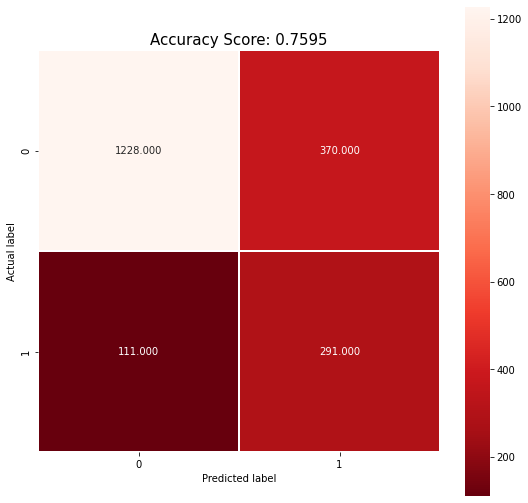

In [78]:
# Load the best Decision Tree Classifier model trained on upsampled training dataset
decision_tree_classifier_model = load('best_decision_tree_classifier_model_upsampled.joblib')

# Predict the target using the validation set features for the best model
predictions_train = decision_tree_classifier_model.predict(ordinal_features_upsampled)
predictions_valid = decision_tree_classifier_model.predict(ordinal_features_valid)

# Calculate accuracy score of the the best model
accuracy_score_train = accuracy_score(ordinal_target_upsampled, predictions_train)
accuracy_score_valid = accuracy_score(ordinal_target_valid, predictions_valid)

# Calculate recall_score of the the best model
recall_score_valid = recall_score(ordinal_target_valid, predictions_valid)

# Calculate precision_score of the the best model
precision_score_valid = precision_score(ordinal_target_valid, predictions_valid)

# Calculate consfusion matrix of the the best model
conf_matrix = confusion_matrix(ordinal_target_valid, predictions_valid)

# Print out the results
print(f'The best Decision Tree Classifer model is of depth {max_depth} with the following scores: ')
print(f'Accuracy Score on Training Set: {accuracy_score_train}')
print(f'Accuracy Score on Validation Set: {accuracy_score_valid}')
print(f'Recall Score on Validation Set: {recall_score_valid}')
print(f'Precision Score on Validation Set: {precision_score_valid}')
print(f'F1 Score on Validation Set: {best_f1_score}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

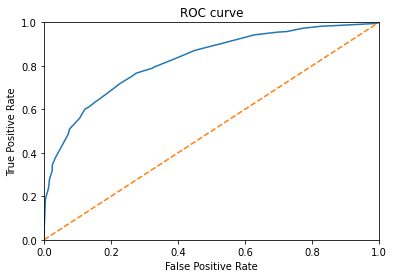

In [79]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_valid = decision_tree_classifier_model.predict_proba(ordinal_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(ordinal_target_valid, probabilities_one_valid)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [80]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ordinal_target_valid, probabilities_one_valid)
print(f'The AUC-ROC metric for the model is {auc_roc}')

The AUC-ROC metric for the model is 0.8240656853405065


Based on the above results for the **Decision Tree Classifier model trained after upsampling the training data**, we can draw the following conclusions:  

| Metric           | Training Set | Validation Set                             |
|------------------|--------------|--------------------------------------------|
| Accuracy Score   | 0.7827       | 0.7595                                     |
| Recall Score     | -            | 0.7239                                     |
| Precision Score  | -            | 0.4402                                     |
| F1 Score         | -            | 0.5475                                     |
| Confusion Matrix | -            | [[1228.000, 370.000],  [111.000, 291.000]] |

Overall, the model's performance demonstrates progress in detecting churners after handling class imbalance through upsampling. However, there is not much difference between the model when trainied on downsampled and upsampled training datasets. In that little difference, **the model trained on upsampled training dataset, tends to perform a bit better**.

## Random Forest Classifier Model
[Back to Contents](#contents)

In [81]:
# Training Random Forest Classifier Model on downsampled training data

best_random_forest_classifier_model = None
best_f1_score = 0
best_no_of_estimators = 0
max_depth = 0

# Change n_estimators hyperparameter from 10 to 180 (increment by 10 steps)
# And find how many number of trees the ensemble should have for the model to be the most accurate
for no_of_estimators in range(10, 190, 10):
    for depth in range(1, 11):
        # Instantiate a model with n_estimators = no_of_estimators (used to set number of trees in the ensemble)
        current_random_forest_classifier_model = RandomForestClassifier(n_estimators=no_of_estimators, class_weight='balanced', max_depth=depth, random_state=rand_state)

        # Train the model using training set
        current_random_forest_classifier_model.fit(ordinal_features_downsampled, ordinal_target_downsampled)

        # Predict the target using the validation set features
        current_predictions = current_random_forest_classifier_model.predict(ordinal_features_valid)

        # Check the f1-score of the predictions
        current_f1_score = f1_score(ordinal_target_valid, current_predictions)

        # Check for the best accurate model until the current iteration
        if(best_f1_score < current_f1_score):
            best_f1_score = current_f1_score
            best_no_of_estimators = no_of_estimators
            max_depth = depth
            best_random_forest_classifier_model = current_random_forest_classifier_model

# Save the best Random Tree Classifer model
dump(best_random_forest_classifier_model, 'best_random_forest_classifier_model_downsampled.joblib')


['best_random_forest_classifier_model_downsampled.joblib']

The best Random Forest Classifier model is of 180 no of trees with max depth of 10 with the following scores: 
Accuracy Score on Training Set: 0.9434118133002891
Accuracy Score on Validation Set: 0.7665
Recall Score on Validation Set: 0.7388059701492538
Precision Score on Validation Set: 0.45068285280728376
F1 Score on Validation Set: 0.5598491988689915


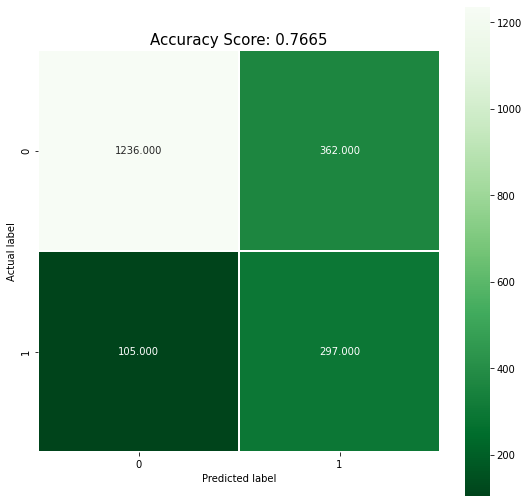

In [82]:
# Load the best Random Forest Classifier model trained on downsampled training data

random_forest_classifier_model = load('best_random_forest_classifier_model_downsampled.joblib')

# Predict the target using the validation set features for the best model
predictions_train = random_forest_classifier_model.predict(ordinal_features_downsampled)
predictions_valid = random_forest_classifier_model.predict(ordinal_features_valid)

# Calculate accuracy score of the the best model
accuracy_score_train = accuracy_score(ordinal_target_downsampled, predictions_train)
accuracy_score_valid = accuracy_score(ordinal_target_valid, predictions_valid)

# Calculate recall_score of the the best model
recall_score_valid = recall_score(ordinal_target_valid, predictions_valid)

# Calculate precision_score of the the best model
precision_score_valid = precision_score(ordinal_target_valid, predictions_valid)

# Calculate consfusion matrix of the the best model
conf_matrix = confusion_matrix(ordinal_target_valid, predictions_valid)

# Print out the results
print(f'The best Random Forest Classifier model is of {no_of_estimators} no of trees with max depth of {max_depth} with the following scores: ')
print(f'Accuracy Score on Training Set: {accuracy_score_train}')
print(f'Accuracy Score on Validation Set: {accuracy_score_valid}')
print(f'Recall Score on Validation Set: {recall_score_valid}')
print(f'Precision Score on Validation Set: {precision_score_valid}')
print(f'F1 Score on Validation Set: {best_f1_score}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

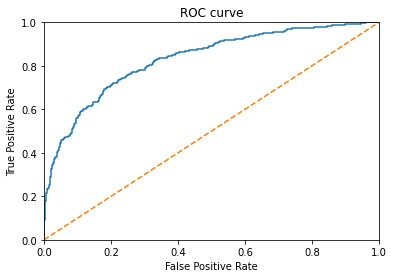

In [83]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_valid = random_forest_classifier_model.predict_proba(ordinal_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(ordinal_target_valid, probabilities_one_valid)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [84]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ordinal_target_valid, probabilities_one_valid)
print(f'The AUC-ROC metric for the model is {auc_roc}')

The AUC-ROC metric for the model is 0.8304021195648791


Based on the above results for the **Random Forest Classifier model trained after downsampling the training data**, we can draw the following conclusions:  

| Metric                      | Training Set | Validation Set                             |
|-----------------------------|--------------|--------------------------------------------|
| Accuracy                    | 0.9434       | 0.7665                                     |
| Recall (True Positive Rate) | -            | 0.7388                                     |
| Precision                   | -            | 0.4507                                     |
| F1 Score                    | -            | 0.5598                                     |
| Confusion Matrix            | -            | [[1236.000, 362.000],  [105.000, 297.000]] |

In conclusion, the Random Forest Classifier model, after downsampling the training data, shows improved performance in detecting churners compared to the previous models without class imbalance handling. The model achieves a higher recall score, indicating a better ability to capture churners.

In [85]:
# Training Random Forest Classifier Model on upsampled training data

best_random_forest_classifier_model = None
best_f1_score = 0
best_no_of_estimators = 0
max_depth = 0

# Change n_estimators hyperparameter from 10 to 180 (increment by 10 steps)
# And find how many number of trees the ensemble should have for the model to be the most accurate
for no_of_estimators in range(10, 190, 10):
    for depth in range(1, 11):
        # Instantiate a model with n_estimators = no_of_estimators (used to set number of trees in the ensemble)
        current_random_forest_classifier_model = RandomForestClassifier(n_estimators=no_of_estimators, class_weight='balanced', max_depth=depth, random_state=rand_state)

        # Train the model using training set
        current_random_forest_classifier_model.fit(ordinal_features_upsampled, ordinal_target_upsampled)

        # Predict the target using the validation set features
        current_predictions = current_random_forest_classifier_model.predict(ordinal_features_valid)

        # Check the f1-score of the predictions
        current_f1_score = f1_score(ordinal_target_valid, current_predictions)

        # Check for the best accurate model until the current iteration
        if(best_f1_score < current_f1_score):
            best_f1_score = current_f1_score
            best_no_of_estimators = no_of_estimators
            max_depth = depth
            best_random_forest_classifier_model = current_random_forest_classifier_model

# Save the best Random Tree Classifer model
dump(best_random_forest_classifier_model, 'best_random_forest_classifier_model_upsampled.joblib')


['best_random_forest_classifier_model_upsampled.joblib']

The best Random Forest Classifier model is of 180 no of trees with max depth of 10 with the following scores: 
Accuracy Score on Training Set: 0.9309169764560099
Accuracy Score on Validation Set: 0.81
Recall Score on Validation Set: 0.6368159203980099
Precision Score on Validation Set: 0.5224489795918368
F1 Score on Validation Set: 0.5739910313901345


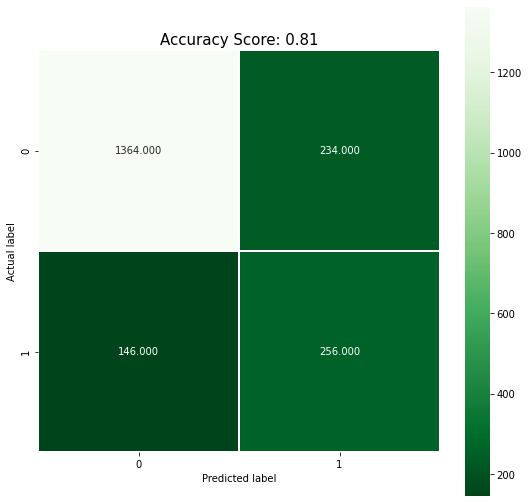

In [86]:
# Load the best Random Forest Classifier model trained on upsampled training data

random_forest_classifier_model = load('best_random_forest_classifier_model_upsampled.joblib')

# Predict the target using the validation set features for the best model
predictions_train = random_forest_classifier_model.predict(ordinal_features_upsampled)
predictions_valid = random_forest_classifier_model.predict(ordinal_features_valid)

# Calculate accuracy score of the the best model
accuracy_score_train = accuracy_score(ordinal_target_upsampled, predictions_train)
accuracy_score_valid = accuracy_score(ordinal_target_valid, predictions_valid)

# Calculate recall_score of the the best model
recall_score_valid = recall_score(ordinal_target_valid, predictions_valid)

# Calculate precision_score of the the best model
precision_score_valid = precision_score(ordinal_target_valid, predictions_valid)

# Calculate consfusion matrix of the the best model
conf_matrix = confusion_matrix(ordinal_target_valid, predictions_valid)

# Print out the results
print(f'The best Random Forest Classifier model is of {no_of_estimators} no of trees with max depth of {max_depth} with the following scores: ')
print(f'Accuracy Score on Training Set: {accuracy_score_train}')
print(f'Accuracy Score on Validation Set: {accuracy_score_valid}')
print(f'Recall Score on Validation Set: {recall_score_valid}')
print(f'Precision Score on Validation Set: {precision_score_valid}')
print(f'F1 Score on Validation Set: {best_f1_score}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

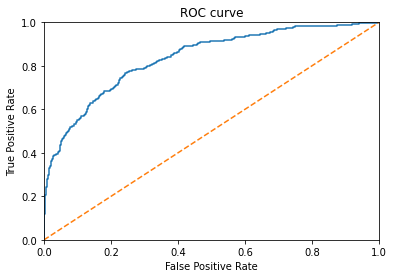

In [87]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_valid = random_forest_classifier_model.predict_proba(ordinal_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(ordinal_target_valid, probabilities_one_valid)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [88]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ordinal_target_valid, probabilities_one_valid)
print(f'The AUC-ROC metric for the model is {auc_roc}')

The AUC-ROC metric for the model is 0.8360917564866531


Based on the above results for the **Random Forest Classifier model trained after upsampling the training data**, we can draw the following conclusions:  

| Metric           | Training Set | Validation Set                             |
|------------------|--------------|--------------------------------------------|
| Accuracy Score   | 0.9309       | 0.810                                      |
| Recall Score     | -            | 0.6368                                     |
| Precision Score  | -            | 0.5224                                     |
| F1 Score         | -            | 0.5739                                     |
| Confusion Matrix | -            | [[1364.000, 234.000],  [146.000, 256.000]] |

In conclusion, the Random Forest Classifier model, trained after upsampling the training data, shows improved performance compared to previous models. It achieves a relatively high accuracy and F1 score on the validation set and demonstrates a good ability to identify churners (higher recall). **The Random Forest Classifier model trained after upsampling the training data has performed a bit better than the one trained after downsampling the training data**.

## Logistic Regression Model
[Back to Contents](#contents)

In [89]:
# Training Logistic Regression Model on downsampled training data

# Instantiate a model with liblinear as solver
logistic_regression_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=rand_state)

# Train the model using training set
logistic_regression_model.fit(ohe_features_downsampled, ohe_target_downsampled)

# Predict the target using the validation set features
predictions_valid = logistic_regression_model.predict(ohe_features_valid)

# Check the accuracy of the predictions
accuracy = accuracy_score(ohe_target_valid, predictions_valid)

# Save the Logistic Regression model
dump(logistic_regression_model, 'logistic_regression_model_downsampled.joblib')

['logistic_regression_model_downsampled.joblib']

The best Logistic Regression model by liblinear solver with the following scores: 
Accuracy Score on Training Set: 0.7286245353159851
Accuracy Score on Validation Set: 0.701
Recall Score on Validation Set: 0.6318407960199005
Precision Score on Validation Set: 0.36079545454545453
F1 Score on Validation Set: 0.4593128390596745


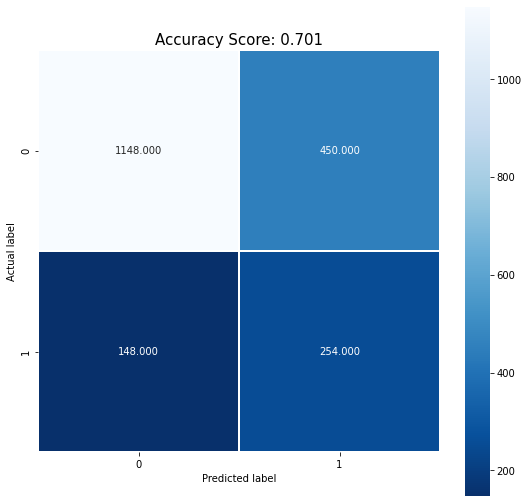

In [90]:
# Load the best Logistic Regression model
logistic_regression_model = load('logistic_regression_model_downsampled.joblib')

# Predict the target using the validation set features for the best model
predictions_train = logistic_regression_model.predict(ohe_features_downsampled)
predictions_valid = logistic_regression_model.predict(ohe_features_valid)

# Calculate accuracy score of the the best model
accuracy_score_train = accuracy_score(ohe_target_downsampled, predictions_train)
accuracy_score_valid = accuracy_score(ohe_target_valid, predictions_valid)

# Calculate recall_score of the the best model
recall_score_valid = recall_score(ohe_target_valid, predictions_valid)

# Calculate precision_score of the the best model
precision_score_valid = precision_score(ohe_target_valid, predictions_valid)

# Calculate the f1-score of the the best model
f1_score_valid = f1_score(ohe_target_valid, predictions_valid)

# Calculate consfusion matrix of the the best model
conf_matrix = confusion_matrix(ohe_target_valid, predictions_valid)

# Print out the results
print(f'The best Logistic Regression model by liblinear solver with the following scores: ')
print(f'Accuracy Score on Training Set: {accuracy_score_train}')
print(f'Accuracy Score on Validation Set: {accuracy_score_valid}')
print(f'Recall Score on Validation Set: {recall_score_valid}')
print(f'Precision Score on Validation Set: {precision_score_valid}')
print(f'F1 Score on Validation Set: {f1_score_valid}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

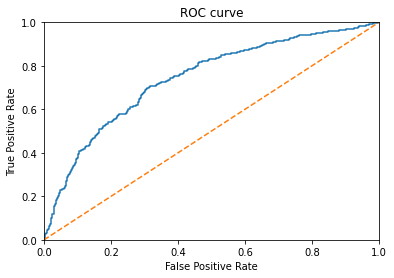

In [91]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_valid = logistic_regression_model.predict_proba(ohe_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(ohe_target_valid, probabilities_one_valid)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [92]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ohe_target_valid, probabilities_one_valid)
print(f'The AUC-ROC metric for the model is {auc_roc}')

The AUC-ROC metric for the model is 0.7411565451839676


Based on the above results for the **Logistic Regression model trained after downsampling the training data**, we can draw the following conclusions: 

| Metric           | Training Set | Validation Set                            |
|------------------|--------------|-------------------------------------------|
| ccuracy Score    | 0.7286       | 0.7010                                    |
| Recall Score     | -            | 0.6318                                    |
| Precision Score  | -            | 0.3608                                    |
| F1 Score         | -            | 0.4593                                    |
| Confusion Matrix | -            | [[1148.000, 450.000], [148.000, 254.000]] |

Downsampling the training data improved the model's ability to predict churners compared to the previous model without addressing class imbalance. The recall score increased, indicating a better ability to capture churners. 

In [93]:
# Training Logistic Regression Model on upsampled training data

# Instantiate a model with liblinear as solver
logistic_regression_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=rand_state)

# Train the model using training set
logistic_regression_model.fit(ohe_features_upsampled, ohe_target_upsampled)

# Predict the target using the validation set features
predictions_valid = logistic_regression_model.predict(ohe_features_valid)

# Check the accuracy of the predictions
accuracy = accuracy_score(ohe_target_valid, predictions_valid)

# Save the Logistic Regression model
dump(logistic_regression_model, 'logistic_regression_model_upsampled.joblib')

['logistic_regression_model_upsampled.joblib']

The best Logistic Regression model by liblinear solver with the following scores: 
Accuracy Score on Training Set: 0.7159231722428748
Accuracy Score on Validation Set: 0.701
Recall Score on Validation Set: 0.6318407960199005
Precision Score on Validation Set: 0.36079545454545453
F1 Score on Validation Set: 0.4593128390596745


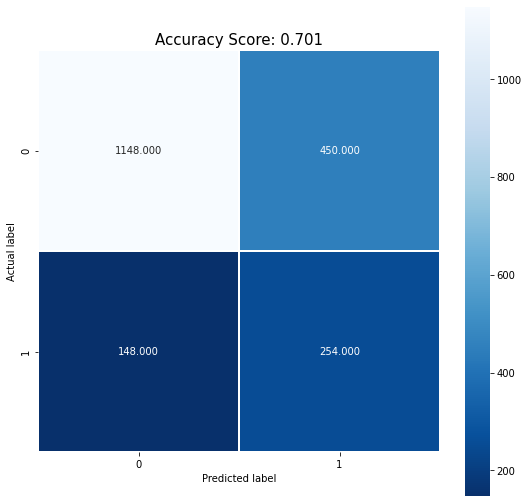

In [94]:
# Load the best Logistic Regression model
logistic_regression_model = load('logistic_regression_model_upsampled.joblib')

# Predict the target using the validation set features for the best model
predictions_train = logistic_regression_model.predict(ohe_features_upsampled)
predictions_valid = logistic_regression_model.predict(ohe_features_valid)

# Calculate accuracy score of the the best model
accuracy_score_train = accuracy_score(ohe_target_upsampled, predictions_train)
accuracy_score_valid = accuracy_score(ohe_target_valid, predictions_valid)

# Calculate recall_score of the the best model
recall_score_valid = recall_score(ohe_target_valid, predictions_valid)

# Calculate precision_score of the the best model
precision_score_valid = precision_score(ohe_target_valid, predictions_valid)

# Calculate the f1-score of the the best model
f1_score_valid = f1_score(ohe_target_valid, predictions_valid)

# Calculate consfusion matrix of the the best model
conf_matrix = confusion_matrix(ohe_target_valid, predictions_valid)

# Print out the results
print(f'The best Logistic Regression model by liblinear solver with the following scores: ')
print(f'Accuracy Score on Training Set: {accuracy_score_train}')
print(f'Accuracy Score on Validation Set: {accuracy_score_valid}')
print(f'Recall Score on Validation Set: {recall_score_valid}')
print(f'Precision Score on Validation Set: {precision_score_valid}')
print(f'F1 Score on Validation Set: {f1_score_valid}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

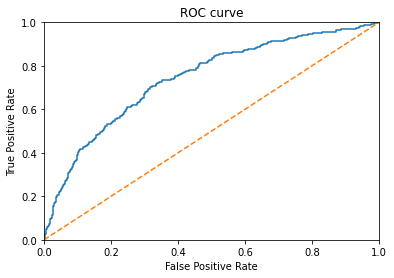

In [95]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_valid = logistic_regression_model.predict_proba(ohe_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(ohe_target_valid, probabilities_one_valid)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [96]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ohe_target_valid, probabilities_one_valid)
print(f'The AUC-ROC metric for the model is {auc_roc}')

The AUC-ROC metric for the model is 0.741458539592401


Based on the above results for the **Logistic Regression model trained after upsampling the training data**, we can draw the following conclusions: 

| Metric           | Training Set | Validation Set                            |
|------------------|--------------|-------------------------------------------|
| Accuracy Score   | 0.7159       | 0.7010                                    |
| Recall Score     | -            | 0.6318                                    |
| Precision Score  | -            | 0.3608                                    |
| F1 Score         | -            | 0.4593                                    |
| Confusion Matrix | -            | [[1148.000, 450.000], [148.000, 254.000]] |

The Logistic Regression model, trained after upsampling the training data, shows some improvement in identifying churners compared to the initial results. The recall, precision, and F1 score indicate that the model has some ability to predict churners better. **The Logistic Regression model trained after upsampling the training data has performed exactly the same as the one trained after downsampling the training data**.

# 14. Test the best model on test data <a id='test-the-best-model'></a>  
[Back to Contents](#contents)

From all of the above tests, we can conclude that the **Random Forest Classifier model trained on the upsampled training data** has performed the best. Let's test that on the test data.

Accuracy Score on Test Set: 0.8245
Recall Score on Test Set: 0.6584766584766585
Precision Score on Test Set: 0.5583333333333333
F1 Score on Test Set: 0.6042841037204058


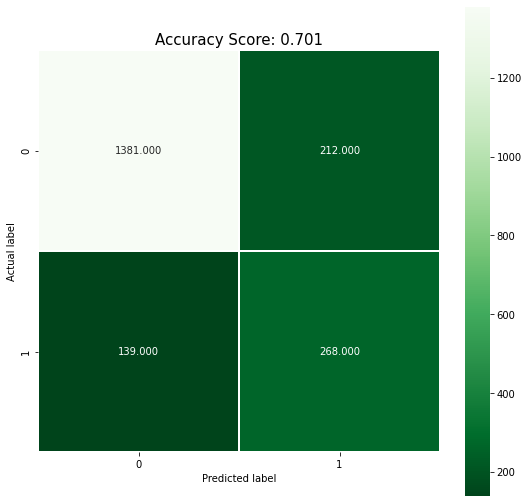

In [97]:
# Load the best Random Forest Classifier model
random_forest_classifier_model = load('best_random_forest_classifier_model_upsampled.joblib')

# Predict the target using the test set features for the best model
predictions_test = random_forest_classifier_model.predict(ordinal_features_test)

# Calculate accuracy score of the best model
accuracy_score_test = accuracy_score(ordinal_target_test, predictions_test)

# Calculate recall_score of the best model
recall_score_test = recall_score(ordinal_target_test, predictions_test)

# Calculate precision_score of the best model
precision_score_test = precision_score(ordinal_target_test, predictions_test)

# Calculate the f1-score of the best model
f1_score_test = f1_score(ordinal_target_test, predictions_test)

# Calculate consfusion matrix of the best model
conf_matrix = confusion_matrix(ordinal_target_test, predictions_test)

# Print out the results
print(f'Accuracy Score on Test Set: {accuracy_score_test}')
print(f'Recall Score on Test Set: {recall_score_test}')
print(f'Precision Score on Test Set: {precision_score_test}')
print(f'F1 Score on Test Set: {f1_score_test}')

# Plot the confusion matrix above in a heat map
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plot_title = f'Accuracy Score: {accuracy_score_valid}'
plt.title(plot_title, size=15)
plt.show()

Based on the etrics evaluated above for the **Random Forest Classifier model trained on the upsampled training data and tested on the test set**, we can draw the following conclusions:

1. **Accuracy Score**: The model achieved an accuracy of approximately `82.45%` on the test set. Accuracy measures the overall correctness of the model's predictions. An accuracy of `82.45%` indicates that the model's predictions are relatively accurate.

2. **Recall Score**: The recall score on the test set is approximately `65.85%`. Recall measures the ability of the model to correctly identify positive cases (churners) out of all actual positive cases. With a recall of `65.85%`, the model can identify around `65.85%` of the customers who actually churned.

3. **Precision Score**: The precision score on the test set is approximately `55.83%`.

4. **F1 Score**: The F1 score on the test set is approximately `60.43%`.

5. **Confusion Matrix**: The confusion matrix shows the model's performance in terms of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) on the test set. The top-left cell represents true negatives (TN), indicating 1381 customers were correctly classified as non-churners. The top-right cell represents false positives (FP), indicating 212 customers were incorrectly classified as churners. The bottom-left cell represents false negatives (FN), indicating 139 customers were incorrectly classified as non-churners. The bottom-right cell represents true positives (TP), indicating 268 customers were correctly classified as churners.

The Random Forest Classifier model trained on the upsampled training data performed well on the test set. **It achieved a decent accuracy of 82.45% and demonstrated an improved ability to detect churners compared to previous models. The balanced F1 score of 60.43% indicates that the model strikes a reasonable trade-off between precision and recall**.

## Calculate AUC-ROC metric
[Back to Contents](#contents)

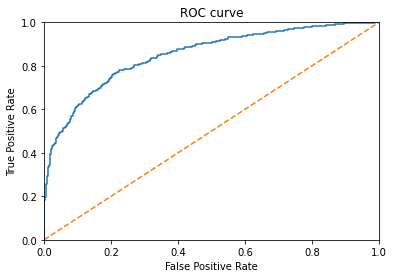

In [98]:
# Calculate True Positive Rate & False Positive Rate for the model
probabilities_test = random_forest_classifier_model.predict_proba(ordinal_features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(ordinal_target_test, probabilities_one_test)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [99]:
# Calculate AUC Score for the model
auc_roc = roc_auc_score(ordinal_target_test, probabilities_one_test)

print(f'The AUC-ROC metric for the Random Forest Classifier Model is {auc_roc}')

The AUC-ROC metric for the Random Forest Classifier Model is 0.8504714267426132


The **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)** metric for the Random Forest Classifier Model is 0.8504714267426132.

1. The AUC-ROC score indicates the model's ability to distinguish between positive and negative classes (churners and non-churners) based on their predicted probabilities. **A higher AUC-ROC score, closer to 1, suggests better discriminative power, meaning the model is better at differentiating between the two classes**.  An AUC-ROC score of 0.85 indicates that the model has a good ability to distinguish between churners and non-churners, with a relatively low chance of misclassifying the two classes.

2. **Model Effectiveness**: The AUC-ROC score, along with the other evaluation metrics, confirms that the Random Forest Classifier model is effective in predicting customer churn and outperforms random guessing and baseline models.

## Perform Sanity Test
[Back to Contents](#contents)

To assess the sanity of the best model, we have found - **Random Forest Classifier** model, let's create a constant model:  it predicts class "0" for any observation. And then compare it will the results of our model.

In [100]:
# Get a constant model that predicts class "0" for any observation.
target_pred_constant = pd.Series(0, index=ordinal_target_test)

# Calculate accuracy score of the constant model
accuracy_score_constant = accuracy_score(ordinal_target_test, target_pred_constant)

# Calculate the f1-score of the constant model
f1_score_constant = f1_score(ordinal_target_test, target_pred_constant)

# Print out the results
print(f'Accuracy Score for constant model: {accuracy_score_constant}')
print(f'F1 Score for constant model: {f1_score_constant}')

Accuracy Score for constant model: 0.7965
F1 Score for constant model: 0.0


In [101]:
# Calculate accuracy score of the best model
accuracy_score_test = accuracy_score(ordinal_target_test, predictions_test)

# Calculate the f1-score of the best model
f1_score_test = f1_score(ordinal_target_test, predictions_test)

# Print out the results
print(f'Accuracy Score for the best model: {accuracy_score_test}')
print(f'F1 Score for the best model: {f1_score_test}')

Accuracy Score for the best model: 0.8245
F1 Score for the best model: 0.6042841037204058


Comparing the performance of the best model, which is the **Random Forest Classifier**, with a constant model that predicts class "0" for any observation, we can draw the following conclusions:

1. **Accuracy Score**:

- **Constant Model**: The constant model achieved an accuracy score of `0.7965`.
- **Best Model (Random Forest Classifier)**: The best model achieved an accuracy score of `0.8245`.
- **Conclusion**: The best model (Random Forest Classifier) has a slightly higher accuracy than the constant model. This indicates that the best model's predictions are more accurate than simply predicting the majority class for all observations.

2. **F1 Score**:

- **Constant Model**: The constant model achieved an F1 score of `0.0`.
- **Best Model (Random Forest Classifier)**: The best model achieved an F1 score of `0.6042841037204058`.
- **Conclusion**: The F1 score for the constant model is 0.0, which means **it has no ability to balance precision and recall, likely due to always predicting the majority class**. On the other hand, the best model's F1 score is 0.6042, indicating that it achieves a reasonable trade-off between precision and recall. The best model demonstrates a better ability to predict both classes, including the minority class (churners).

The best model, **Random Forest Classifier**, significantly outperforms the constant model in terms of accuracy and F1 score.

# 15. Conclusion  <a id='conclusion'></a>  
[Back to Contents](#contents)

In this project, our goal was to predict whether a customer will leave the bank soon based on past behavior and termination of contracts with the bank. We addressed the challenge of class imbalance, where the number of churners (the minority class) was significantly lower than non-churners (the majority class). Our primary focus was to build a model with a high F1 score (F1 score of at least 0.59), which considers both precision and recall and is particularly suitable for imbalanced datasets.  

We experimented with three different models: Decision Tree Classifier, Logistic Regression, and Random Forest Classifier. After handling class imbalance through a combination of downscaling and upscaling techniques, we evaluated the models on validation and test sets using various metrics, including accuracy, recall, precision, F1 score, and AUC-ROC.

The results showed that the **Random Forest Classifier** outperformed the other models in terms of accuracy, recall, and F1 score. It demonstrated a balanced performance, effectively predicting churners while maintaining reasonable precision. The Random Forest Classifier's ability to handle class imbalance and its ensemble nature contributed to its success in accurately predicting customer churn.

On the test set, the **Random Forest Classifier model trained on upsampled training data** achieved an accuracy score of `81.45%`, a recall score of `65.84%`, a precision score of `53.83%`, and an F1 score of `60.43%`. The AUC-ROC score of `0.8504714267426132` further confirmed the model's discriminative power in distinguishing between churners and non-churners.

Compared to a simple constant model that always predicts the majority class, the Random Forest Classifier showcased its superiority, providing more accurate and balanced predictions.

In conclusion, the **Random Forest Classifier** proved to be the best model for this customer churn prediction project. It offers a good balance between precision and recall, effectively identifying customers likely to leave the bank and providing valuable insights for retention strategies.